In [1]:
import os
import numpy as np

import pandas as pd

from scipy import stats
from scipy.interpolate import interp1d

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import glob
import natsort

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from RSRTxReadBin import RTxReadBin

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_19169/3193881200.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [10]:
path = 'data-sets/data-set-8'
ds8_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.csv'))

In [12]:
avg_pwr = np.array([])

for i in ds8_files:
    avg_pwr_i = np.average(pd.read_csv(i))
    avg_pwr = np.append(avg_pwr, avg_pwr_i)

In [27]:
ds8_mA = np.array([0,0.1,0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.45])

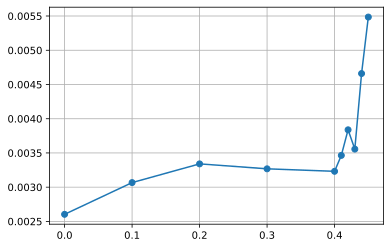

In [29]:
plt.plot(ds8_mA,avg_pwr,'o-')
plt.grid()

In [31]:
def acf(data):
	mean = np.mean(data)
	var = data.var()
	length = len(data)

	acf_array = []
	for t in np.arange(0,length):
		temp = np.mean((data[:(length-t)] - mean)*(data[t:] - mean))/var
		acf_array.append(temp)

	acf_array = np.array(acf_array)
	return acf_array

tau: 90
len: 900000


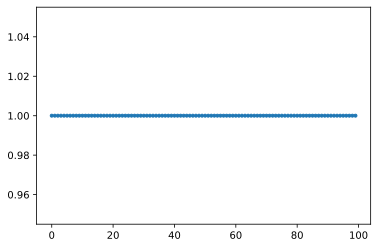

In [82]:
y = pd.read_csv(ds8_files[0])

y = y[0:900000]

mean = np.mean(y)
sq_mean = np.mean(y**2)
var = y.var()

tau = int(len(y)/10000)
print('tau:',tau)
lenght = len(y)
print('len:',lenght)

g2_tau_array = []

for t in range(0,tau*100,tau):
    #g2_t = np.mean(y[:(lenght-tau)]*y[tau:])/sq_mean
    g2_t = np.mean((y[:(lenght-t)] - mean)*(y[t:] - mean))/var
    #print(g2_t)
    g2_tau_array.append(g2_t)

g2_tau_array = np.array(g2_tau_array)

plt.plot(g2_tau_array,'.')

In [60]:
def g2_tau(file):
	file = file[0:900000]
	sq_mean = np.mean(file**2)
	tau = int(len(file)/10000)
	lenght = len(file)

	g2_tau_array = []
	for t in range(0,tau*100,tau):
		g2_t = np.mean(file[:lenght-tau]*file[tau:])/sq_mean
		g2_tau_array.append(g2_t)
	
	g2_tau_array = np.array(g2_tau_array)
	
	return g2_tau_array


In [84]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [91]:
asd = pd.read_csv(ds8_files[4])
asd = np.array(asd[0:100000])

estimated_autocorrelation(asd)

ValueError: object too deep for desired array

In [ ]:
def g2_tau(y,t):
    
    num = np.average(y[0:len(y)-t] * y[t:])
    den = np.average(y**2)

In [93]:
from statsmodels.tsa.stattools import acf

acf(y[0:1000])

array([1.        , 0.99924128, 0.99841783, 0.99752965, 0.99657676,
       0.99555998, 0.99447933, 0.99333488, 0.99212674, 0.99085488,
       0.98952014, 0.98812181, 0.98666081, 0.98513634, 0.98354937,
       0.98189986, 0.98018869, 0.97841517, 0.97658106, 0.97468566,
       0.97272898, 0.97071194, 0.96863394, 0.966495  , 0.96429612,
       0.96203735, 0.95971968, 0.95734238, 0.95490568, 0.95241051,
       0.94985693, 0.94724596, 0.94457699, 0.94185087, 0.93906785,
       0.93622734, 0.93333028, 0.93037676, 0.92736717, 0.92430237,
       0.92118169])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 1.200e+01,
        2.100e+01, 1.780e+02, 9.629e+0

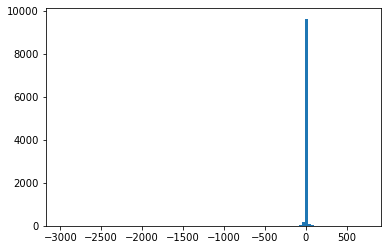

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(size=10000)

plt.hist(np.tan(np.pi*(x-0.5))+0.5,bins=100)